<a href="https://colab.research.google.com/github/Joydeep06/Iris-Decission_Tree/blob/master/Task_4_(Decision_Tree_Algorithm).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task-4**: To explore Decission Tree Algorithm

## **Problem Statement**: For the given 'Iris' dataset, create the decission tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to identify the right class accordingly.

## Importing the libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import sklearn.datasets as datasets

## Accessing the dataset and understanding the data

In [6]:
df=pd.read_csv('Iris.csv', low_memory=False)
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [94]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [95]:
# checking the datatypes of the dataset

df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [98]:
# checking the shape of the dataset

df.shape

(150, 5)

In [96]:
# checking if there is any null values

df.isna().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
# setting the index

df.set_index('Id', inplace=True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


## Visualizing the data

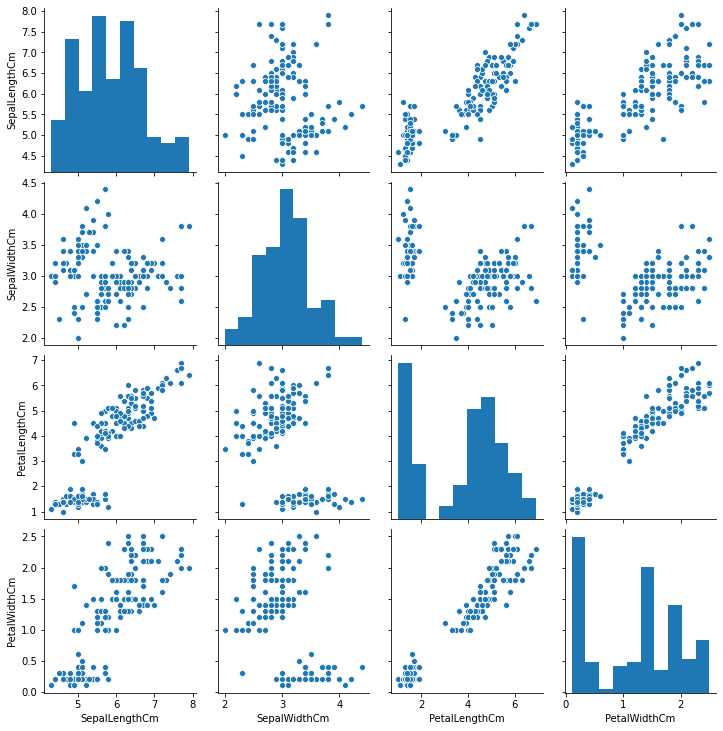

In [8]:
sns.pairplot(df)

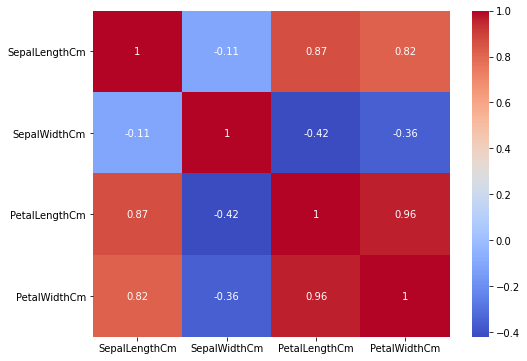

In [9]:
# plotting the correlation among the features

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, cbar=True)
ax.set_ylim([4,0])
ax.set_xlim([0,4])
ax.set_yticklabels(ax.get_xticklabels(), rotation=0);

In [10]:
# creating a copy of our dataset and working with it to avoid any changes that can take place in our original dataset

df_tmp=df.copy()

In [11]:
# viewing the top 5 observations of the copied dataset

df_tmp.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
# convert the string values into categories

for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label]=content.astype("category").cat.as_ordered()

In [13]:
df_tmp.dtypes

SepalLengthCm     float64
SepalWidthCm      float64
PetalLengthCm     float64
PetalWidthCm      float64
Species          category
dtype: object

In [14]:
# Turning the categorical values into numbers

for label, content in df_tmp.items():
  if not pd.api.types.is_numeric_dtype(content):
    df_tmp[label]=pd.Categorical(content).codes+1

In [15]:
df_tmp.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species             int8
dtype: object

In [16]:
df_tmp["Species"].value_counts()

3    50
2    50
1    50
Name: Species, dtype: int64

## Splitting the dataset into `Train` and `Test` data

In [17]:
# creating features and targets in x and y variables

x=df_tmp.drop(['Species'], axis=1)
y=df_tmp['Species']

In [18]:
# splitting the dataset into training and test data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

In [19]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((112, 4), (112,), (38, 4), (38,))

In [20]:
# observing the target distribution in training data

y_train.value_counts(normalize = True)

1    0.339286
3    0.330357
2    0.330357
Name: Species, dtype: float64

In [21]:
# observing the target distribution in test data

y_test.value_counts(normalize = True)

3    0.342105
2    0.342105
1    0.315789
Name: Species, dtype: float64

## Modelling

In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
# training the model with the training dataset

dt_model=DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [24]:
# evaluating the training score

dt_model.score(x_train, y_train)

1.0

In [25]:
# evaluating the test score

dt_model.score(x_test, y_test)

0.8947368421052632

In [31]:
# making predictions on the test data

y_preds=dt_model.predict(x_test)

In [32]:
y_preds

array([1, 2, 2, 2, 1, 2, 2, 3, 3, 3, 2, 3, 2, 2, 1, 1, 1, 2, 1, 2, 3, 2,
       2, 2, 3, 2, 1, 3, 1, 3, 3, 3, 1, 1, 1, 1, 3, 2], dtype=int8)

In [45]:
# Observing the confusion matrix with the True positives, True negatives, False positives and False negatives

from sklearn.metrics import confusion_matrix

In [46]:
confusion_matrix(y_test, y_preds)

array([[12,  0,  0],
       [ 0, 12,  1],
       [ 0,  3, 10]])

## Hyperparameter Tuning

In [55]:
# Tuning the parameter: max_depth

train_accuracy=[]
valid_accuracy=[]

for i in range(1,10):
    dt_model=DecisionTreeClassifier(max_depth=i, random_state=42)
    dt_model.fit(x_train, y_train)
    train_accuracy.append(dt_model.score(x_train, y_train))
    valid_accuracy.append(dt_model.score(x_test, y_test))
    

In [57]:
frame=pd.DataFrame({'max_depth': range(1,10), 'train_acc': train_accuracy, 'valid_acc': valid_accuracy})
frame.head()

,max_depth,train_acc,valid_acc
0,1,0.669643,0.657895
1,2,0.964286,0.921053
2,3,0.964286,0.894737
3,4,0.991071,0.921053
4,5,0.991071,0.894737


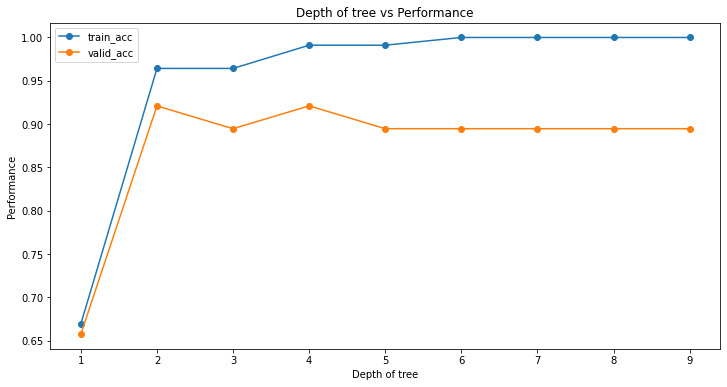

In [58]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'], frame['train_acc'], marker='o', label='train_acc')
plt.plot(frame['max_depth'], frame['valid_acc'], marker='o', label='valid_acc')
plt.xlabel('Depth of tree')
plt.ylabel('Performance')
plt.title('Depth of tree vs Performance')
plt.legend();

In [66]:
# Tuning the parameter: max_leaf_nodes

train1_accuracy=[]
valid1_accuracy=[]

for i in range(2,10):
    dt_model=DecisionTreeClassifier(max_leaf_nodes=i, max_depth=4, random_state=42)
    dt_model.fit(x_train, y_train)
    train1_accuracy.append(dt_model.score(x_train, y_train))
    valid1_accuracy.append(dt_model.score(x_test, y_test))

In [67]:
frame1=pd.DataFrame({'max_leaf_nodes': range(2,10), 'train_acc': train1_accuracy, 'valid_acc': valid1_accuracy})
frame1

,max_leaf_nodes,train_acc,valid_acc
0,2,0.669643,0.657895
1,3,0.964286,0.921053
2,4,0.964286,0.894737
3,5,0.982143,0.921053
4,6,0.982143,0.921053
5,7,0.991071,0.973684
6,8,0.991071,0.973684
7,9,0.991071,0.973684


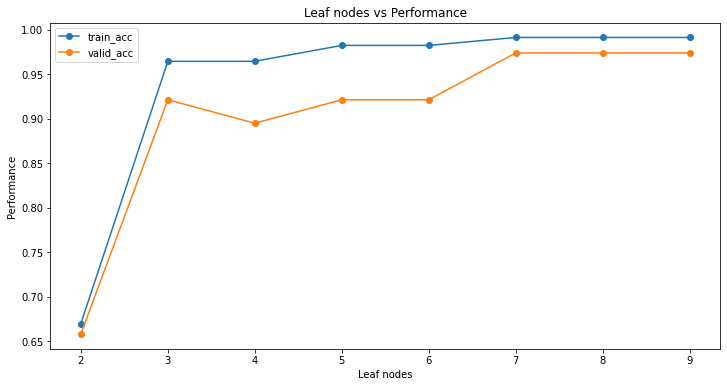

In [68]:
plt.figure(figsize=(12,6))
plt.plot(frame1['max_leaf_nodes'], frame1['train_acc'], marker='o', label='train_acc')
plt.plot(frame1['max_leaf_nodes'], frame1['valid_acc'], marker='o', label='valid_acc')
plt.xlabel('Leaf nodes')
plt.ylabel('Performance')
plt.title('Leaf nodes vs Performance')
plt.legend();

In [81]:
# Tuning the parameter: min_samples_leaf

train2_accuracy=[]
valid2_accuracy=[]

for i in range(1,10):
    dt_model=DecisionTreeClassifier(min_samples_leaf=i, max_leaf_nodes=8, max_depth=4, random_state=42)
    dt_model.fit(x_train, y_train)
    train2_accuracy.append(dt_model.score(x_train, y_train))
    valid2_accuracy.append(dt_model.score(x_test, y_test))

In [82]:
frame2=pd.DataFrame({'min_samples_leaf': range(1,10), 'train_acc': train2_accuracy, 'valid_acc': valid2_accuracy})
frame2.head()

,min_samples_leaf,train_acc,valid_acc
0,1,0.991071,0.973684
1,2,0.982143,0.921053
2,3,0.973214,0.894737
3,4,0.964286,0.894737
4,5,0.964286,0.894737


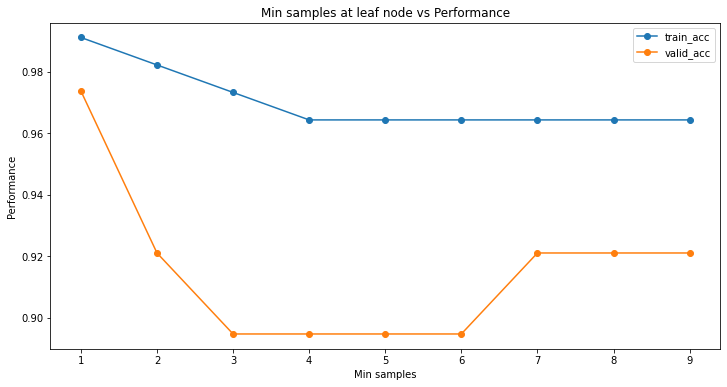

In [83]:
plt.figure(figsize=(12,6))
plt.plot(frame2['min_samples_leaf'], frame2['train_acc'], marker='o', label='train_acc')
plt.plot(frame2['min_samples_leaf'], frame2['valid_acc'], marker='o', label='valid_acc')
plt.xlabel('Min samples')
plt.ylabel('Performance')
plt.title('Min samples at leaf node vs Performance')
plt.legend();

In [84]:
 # Tuning the model with the best parameter values
 
 dt_model=DecisionTreeClassifier(min_samples_leaf=8, max_leaf_nodes=8, max_depth=4, random_state=42)

In [85]:
# training and evaluating the accuracy score of the new model

dt_model.fit(x_train, y_train)
score1=dt_model.score(x_train, y_train)
score2=dt_model.score(x_test, y_test)

print('Training accuracy: ', score1)
print('Validation accuracy: ', score2)

Training accuracy:  0.9642857142857143
Validation accuracy:  0.9210526315789473


## Visualizing the tree graphically

In [86]:
# Install required libraries
!pip install pydotplus
!apt-get install graphviz -y

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


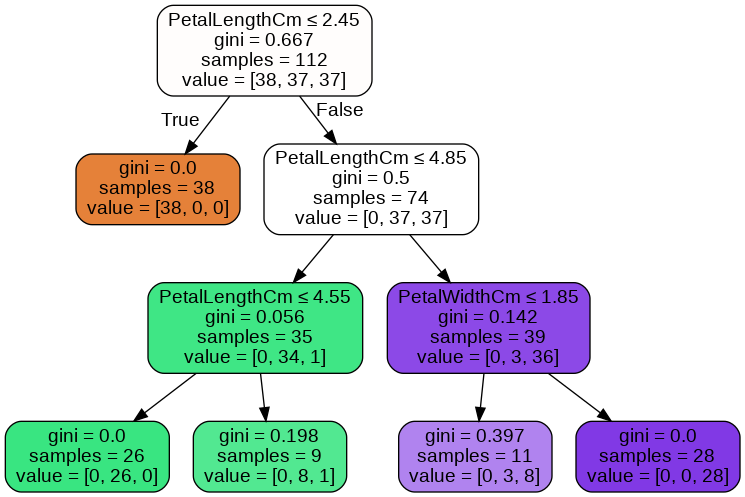

In [87]:
# Import necessary libraries for graph viz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(dt_model, out_file=dot_data, feature_names=x_train.columns,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Evaluating the tuned model

In [88]:
y_preds1=dt_model.predict(x_test)

In [89]:
# we can observe that the confusion matrix result has improved compared to the previous one

confusion_matrix(y_test, y_preds1)

array([[12,  0,  0],
       [ 0, 12,  1],
       [ 0,  2, 11]])

In [90]:
# checking the classification report

from sklearn.metrics import classification_report

In [92]:
print(classification_report(y_test, y_preds1))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       0.86      0.92      0.89        13
           3       0.92      0.85      0.88        13

    accuracy                           0.92        38
   macro avg       0.92      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38

